<a href="https://colab.research.google.com/github/poonam9490/Data-Preprocessing-in-Python/blob/main/Fraud_detection_poonam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# New Section

In [2]:
# Read the data
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(14247, 11)

In [3]:
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [4]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14047,8,PAYMENT,3398.52,C736229777,30331.00,26932.48,M1058760957,0.00,0.00,0.0,0.0
14048,8,TRANSFER,481707.23,C1828500527,26932.48,0.00,C30516998,582875.99,0.00,0.0,0.0
14049,8,TRANSFER,2794982.53,C591190387,0.00,0.00,C1856036778,3804441.59,13688613.94,0.0,0.0
14050,8,TRANSFER,3457807.35,C129339892,0.00,0.00,C991505714,9506473.57,13994753.40,0.0,0.0
14051,8,TRANSFER,516276.21,C1661816191,0.00,0.00,C1327907419,1137614.99,1204577.24,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14242,8,PAYMENT,20924.47,C1540995845,18265.00,0.00,M1309313968,0.00,0.00,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.00,0.00,C1292445663,167.00,0.00,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.00,7167.64,M2001030591,0.00,0.00,0.0,0.0
14245,8,PAYMENT,11465.21,C1837637612,38.00,0.00,M1222093409,0.00,0.00,0.0,0.0


In [5]:
# Check for null values
df.isnull().values.any()

True

In [6]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  14168
Number of Fraud transactions:  78
Percentage of Legit transactions: 99.4525 %
Percentage of Fraud transactions: 0.5475 %


In [12]:
dfresult = df.dropna()
print(dfresult)

       step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1         1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2         1  TRANSFER    181.00  C1305486145          181.0            0.00   
3         1  CASH_OUT    181.00   C840083671          181.0            0.00   
4         1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
...     ...       ...       ...          ...            ...             ...   
14241     8   PAYMENT  35108.12  C1925841262            0.0            0.00   
14242     8   PAYMENT  20924.47  C1540995845        18265.0            0.00   
14243     8  CASH_OUT  75244.54  C1827218030        38369.0            0.00   
14244     8   PAYMENT   3074.36  C1632817923        10242.0         7167.64   
14245     8   PAYMENT  11465.21  C1837637612           38.0            0.00   

          nameDest  oldbalanceDest  newbalanceDest 

In [14]:
# Merchants
X = dfresult[dfresult['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-16-29cc5df22b98>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dfresult.corr()


<Axes: >

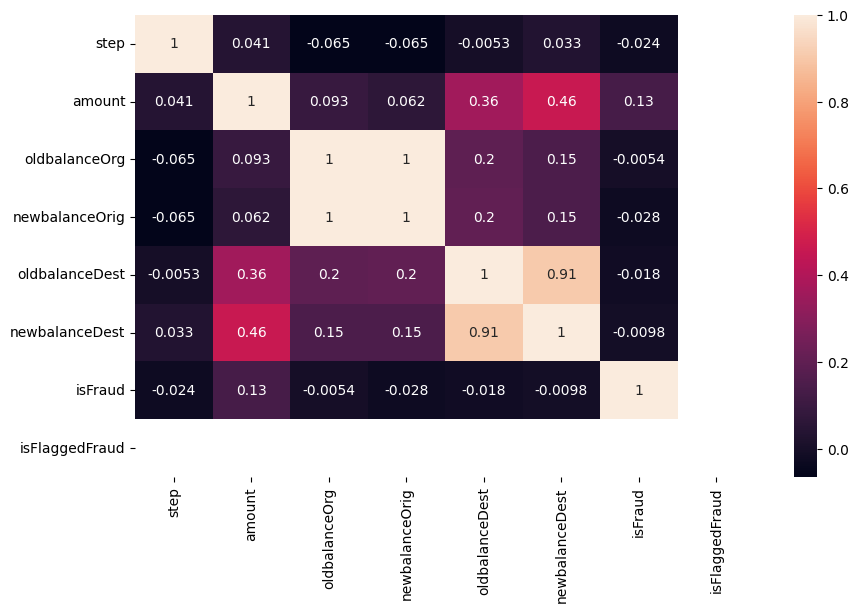

In [16]:
corr=dfresult.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

NUMBER OF LEGIT AND FRAUD TRANSACTIONS

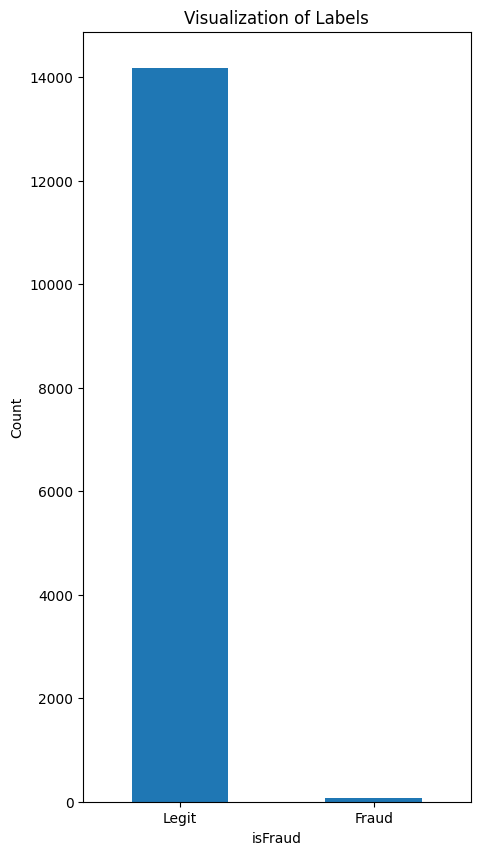

In [17]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [18]:
#creating a copy of original dataset to train and test models

new_df=dfresult.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


LABEL ENCODING

In [19]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [20]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14245
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14246 non-null  int64  
 1   type            14246 non-null  int64  
 2   amount          14246 non-null  float64
 3   nameOrig        14246 non-null  int64  
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  int64  
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.3 MB
None


MULTICOLINEARITY

In [21]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,3.890602
1,type,5.911551
2,amount,2.004518
3,nameOrig,3.218981
4,oldbalanceOrg,233.323708
5,newbalanceOrig,234.926172
6,nameDest,3.753357
7,oldbalanceDest,6.771298
8,newbalanceDest,7.470537
9,isFraud,1.092624


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [22]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,3.733772
1,amount,1.447105
2,isFraud,1.084670
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.212942
5,Actual_amount_dest,1.247691
6,TransactionPath,3.654511


<Axes: >

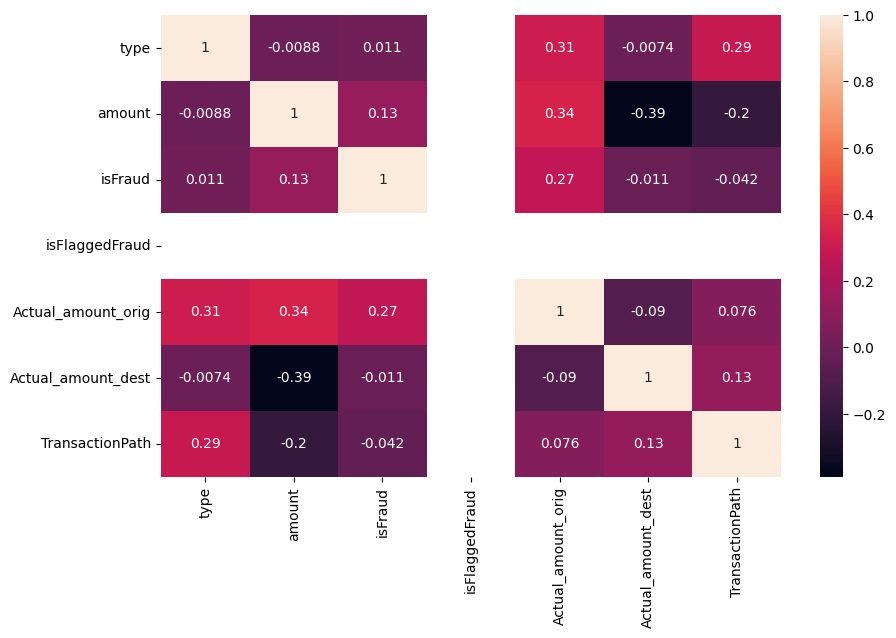

In [24]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

How did you select variables to be included in the model?
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

MODEL BUILDING

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [28]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (9972, 6)
Shape of X_test:  (4274, 6)


In [29]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [30]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

Comparision

In [31]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.41506785212916
Random Forest Score:  99.6490407112775


In [32]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 13
False Positives: 13
True Negatives: 4236
False Negatives: 12
TP,FP,TN,FN - Random Forest
True Positives: 11
False Positives: 1
True Negatives: 4248
False Negatives: 14


In [33]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[4236   13]
 [  12   13]]
Confusion Matrix - Random Forest
[[4248    1]
 [  14   11]]


In [34]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4249
         1.0       0.50      0.52      0.51        25

    accuracy                           0.99      4274
   macro avg       0.75      0.76      0.75      4274
weighted avg       0.99      0.99      0.99      4274

Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4249
         1.0       0.92      0.44      0.59        25

    accuracy                           1.00      4274
   macro avg       0.96      0.72      0.80      4274
weighted avg       1.00      1.00      1.00      4274



**With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.**

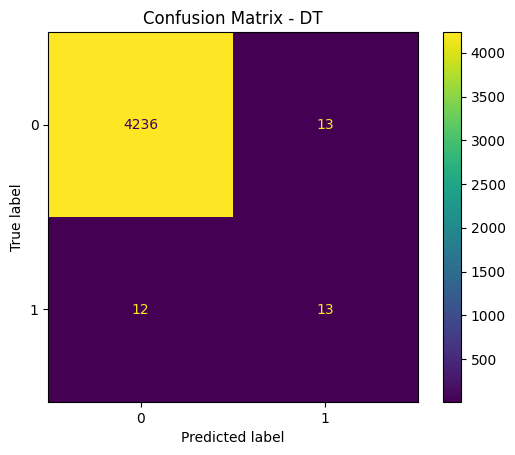

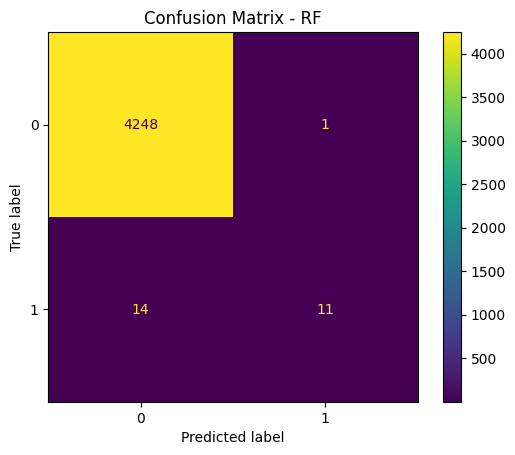

In [35]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

CONCLUSION

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although  **precision of Random Forest is more**. 


another reason of choosing this model is because of highly unbalanced dataset. **Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data** as compared to Decision Tree which makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

**What are the key factors that predict fraudulent customer?**

always check source of request.
Is the name of organisation asking for money is legit or not ?
Also check Transaction history of vendors.

**What kind of prevention should be adopted while company update its infrastructure?**

Use smart vertified apps only and Browse through secured websites.
Use secured internet connections.
Don't respond to unsolicited calls/SMS(s/E-mails.
If you feel like you have been tricked or security compromised, contact your bank immidiately.

**Assuming these actions have been implemented, how would you determine if they work?**

Keep checking your smart phone activity if any sms or call is suspected report urgently.